## **Natural Language Processing - Basics**

> Practice notebook for an introductory course on Natural Language Processing.

In [1]:
import nltk
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

print('Setup done.')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Mounted at /content/drive
Setup done.


### **Explore the data**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/projects/colab-notebooks/datasets/SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']
data.head()


,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


Number of rows and columns in the dataset.

In [3]:
rows = len(data)
columns = len(data.columns)
print("Input data: rows = {}, columns = {}".format(rows, columns))

Input data: rows = 5567, columns = 2


Number of spam / ham tags in the dataset.

In [4]:
spam_count = len(data[data['label'] == 'spam'])
ham_count = len(data[data['label'] == 'ham'])

print('Out of {} rows, there are {} spam and {} ham'.format(
  rows, spam_count, ham_count
))

Out of 5567 rows, there are 746 spam and 4821 ham


Missing data in the dataset.

In [5]:
null_count_label = data['label'].isnull().sum()
null_count_text = data['body_text'].isnull().sum()

print('Number of null in label: {}'.format(null_count_label))
print('Number of null in text_body: {}'.format(null_count_text))

Number of null in label: 0
Number of null in text_body: 0


### **Remove punctuation**

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text):
  text_no_punctuation = ''.join([char for char in text if char not in string.punctuation])
  return text_no_punctuation

In [8]:
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punctuation(x))
data.head()

,label,body_text,body_text_clean
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...


### **Tokenize**

In [9]:
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

In [10]:
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi..."


### **Remove stopwords**

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopwords]
  return text

In [13]:
data['body_text_no_stop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_no_stop
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi..."


### **Stemming**
- it is the process of reducing inflected or derived words to their stem / root
- reduces the corpus of words before feeding it into the model

In [14]:
ps = nltk.PorterStemmer()

In [15]:
def stem(tokenized_list):
  text = [ps.stem(word) for word in tokenized_list]
  return text

In [16]:
data['body_text_stemmed'] = data['body_text_no_stop'].apply(lambda x: stem(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."


### **Lemmatizing**
- it is the process of grouping the inflected form of a word so that they can
be identified by the word's lemma = canonical form of the word (dictionary form 
of a word)
- **stemming** is faster, by chopping off the end of the word, but less accurate and without any understanding of the context
- **lemmatizing** is more accurate and with more analysis around the context of the word

In [17]:
wn = nltk.WordNetLemmatizer()

In [18]:
def lemmatize(tokenized_list):
  text = [wn.lemmatize(word) for word in tokenized_list]
  return text

In [19]:
data['body_text_lemmatized'] = data['body_text_no_stop'].apply(lambda x: lemmatize(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stemmed,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."


### **Count Vectorization**
- document term matrix, counts the number of times each word appears in the document

In [20]:
def clean(text):
  text = remove_punctuation(text)
  tokens = tokenize(text.lower())
  tokens = remove_stopwords(tokens)
  return stem(tokens)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer=clean)

X_counts = count_vectorizer.fit_transform(data['body_text'])

print('Shape of X_count: {}'.format(X_counts.shape))
print(count_vectorizer.get_feature_names_out())

Shape of X_count: (5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [22]:
data_sample = data[0:20]

count_vectorizer_sample = CountVectorizer(analyzer=clean)

X_counts_sample = count_vectorizer_sample.fit_transform(data_sample['body_text'])

print('Shape of X_count_sample: {}'.format(X_counts_sample.shape))
print(count_vectorizer_sample.get_feature_names_out())

Shape of X_count_sample: (20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'paten

In [23]:
X_counts_sample

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [24]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = count_vectorizer_sample.get_feature_names_out()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6day,81010,87077,87121,87575,9,900,aft,aid,alreadi,alright,anymor,appli,ard,around,b,brother,call,caller,callertun,camera,cash,...,sunday,talk,tc,team,text,think,though,tkt,today,tonight,treat,tri,trywal,tsandc,txt,u,updat,ur,urgent,use,usf,v,valid,valu,vettam,want,wap,watch,way,week,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


### **N-gram Vectorization**
- document term matrix, columns represent combinations of N adjacent words from the text

In [25]:
def clean_2(text):
  text = remove_punctuation(text)
  tokens = tokenize(text.lower())
  tokens = remove_stopwords(tokens)
  text = ' '.join(stem(tokens))
  return text

In [26]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_2(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stemmed,body_text_lemmatized,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi...",per request mell mell oru minnaminungint nurun...


In [27]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_counts_ngram = ngram_vectorizer.fit_transform(data[0:20]['cleaned_text'])

print('Shape of X_counts_ngram: {}'.format(X_counts_ngram.shape))
print(ngram_vectorizer.get_feature_names_out())

Shape of X_counts_ngram: (20, 198)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aft finish'
 'aid patent' 'alright way' 'anymor tonight' 'appli 08452810075over18'
 'appli repli' 'ard smth' 'around though' 'brother like'
 'call 09061701461' 'call mobil' 'caller press' 'callertun caller'
 'camera free' 'cash 100' 'chanc win' 'claim 81010' 'claim call'
 'claim code' 'click httpwap' 'click wap' 'co free' 'code kl341'
 'colour mobil' 'comp win' 'copi friend' 'cost 150pday' 'credit click'
 'cri enough' 'csh11 send' 'cup final' 'custom select' 'da stock'
 'date sunday' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh rememb' 'england 87077' 'england macedonia' 'enough today'
 'entitl updat' 'entri questionstd' 'entri wkli' 'even brother' 'fa 87121'
 'fa cup' 'feel way' 'ffffffffff a

In [28]:
X_counts_ngram_df = pd.DataFrame(X_counts_ngram.toarray())
X_counts_ngram_df.columns = ngram_vectorizer.get_feature_names_out()
X_counts_ngram_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,4txtú120 poboxox36504w45wq,6day 16,81010 tc,87077 eg,87077 trywal,87121 receiv,87575 cost,900 prize,aft finish,aid patent,alright way,anymor tonight,appli 08452810075over18,appli repli,ard smth,around though,brother like,call 09061701461,call mobil,caller press,callertun caller,camera free,cash 100,chanc win,claim 81010,claim call,claim code,click httpwap,click wap,co free,...,talk stuff,tc wwwdbuknet,team 87077,text fa,think goe,tkt 21st,tonight ive,treat like,tri month,trywal scotland,tsandc appli,txt csh11,txt messag,txt ratetc,txt ur,txt word,updat co,updat latest,ur lunch,ur nation,urgent week,use credit,usf live,valid 12,valu network,vettam set,want talk,wap link,way feel,way gota,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


### **TF-IDF Vectorization**
- document text matrix, cells represent a weighting representing how important a word is in the text

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=clean)

X_tfidf_sample = tfidf_vectorizer.fit_transform(data[0:20]['body_text'])

print('Shape of X_tdif: {}'.format(X_tfidf_sample.shape))
print(tfidf_vectorizer.get_feature_names_out())

Shape of X_tdif: (20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay'

In [30]:
X_tfidf_sample_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_sample_df.columns = tfidf_vectorizer.get_feature_names_out()
X_tfidf_sample_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6day,81010,87077,87121,87575,9,900,aft,aid,alreadi,alright,anymor,appli,ard,around,b,brother,call,caller,callertun,camera,cash,...,sunday,talk,tc,team,text,think,though,tkt,today,tonight,treat,tri,trywal,tsandc,txt,u,updat,ur,urgent,use,usf,v,valid,valu,vettam,want,wap,watch,way,week,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157831,0.000000,0.198986,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.198986,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.133757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.362045,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.447214,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.00

### **Feature Creation**

In [31]:
data['body_length'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))
data[['label', 'body_text', 'body_length']].head()

,label,body_text,body_length
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [32]:
def count_punctuation(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count / (len(text) - text.count(' ')), 3) * 100


In [33]:
data['body_punctuation_%'] = data['body_text'].apply(lambda x: count_punctuation(x))
data[['label', 'body_text', 'body_length', 'body_punctuation_%']].head()

,label,body_text,body_length,body_punctuation_%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


Examine the two created features.

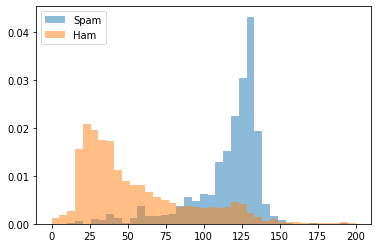

In [34]:
bins = np.linspace(0, 200, 40) # array of 40 evenly spaced numbers between 0 and 200
plt.hist(x=data[data['label'] == 'spam']['body_length'], bins=bins, alpha=.5, density=True, label='Spam')
plt.hist(x=data[data['label'] == 'ham']['body_length'], bins=bins, alpha=.5, density=True,label='Ham')
plt.legend(loc='upper left')
plt.show()

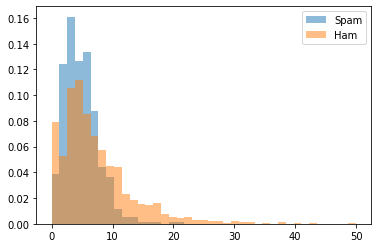

In [35]:
bins = np.linspace(0, 50, 40)
plt.hist(x=data[data['label'] == 'spam']['body_punctuation_%'], bins=bins, alpha=.5, density=True, label='Spam')
plt.hist(x=data[data['label'] == 'ham']['body_punctuation_%'], bins=bins, alpha=.5, density=True, label='Ham')
plt.legend(loc='upper right')
plt.show()

It can be seen that the assumpion that the length of the message may differentiate between spam or not spam, but the punctuation feature is not helpful in this context.

### **Feature Transformations**

In [36]:
data[['label', 'body_text', 'body_length', 'body_punctuation_%']].head()

,label,body_text,body_length,body_punctuation_%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


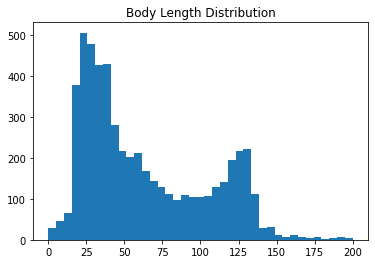

In [37]:
bins = np.linspace(0, 200, 40)
plt.hist(x=data['body_length'], bins=bins) # the full distribution
plt.title('Body Length Distribution')
plt.show()


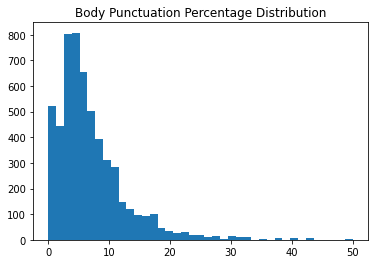

In [38]:
bins = np.linspace(0, 50, 40)
plt.hist(x=data['body_punctuation_%'], bins=bins) # the full distribution
plt.title('Body Punctuation Percentage Distribution')
plt.show()


We are looking for a feature to transform: the body punctuation percentage is a good candidate.

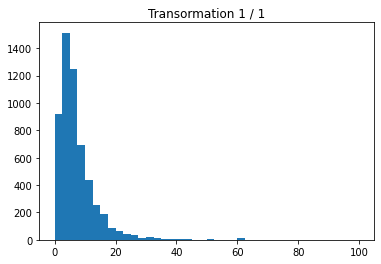

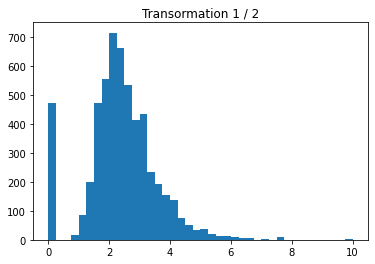

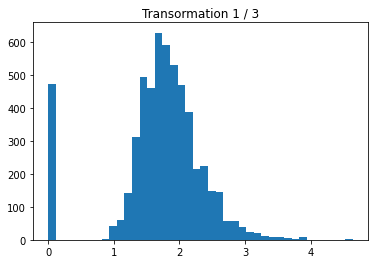

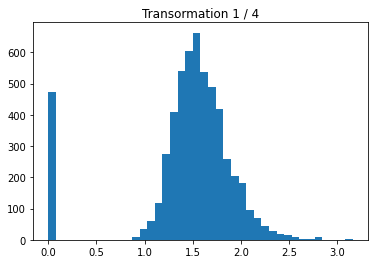

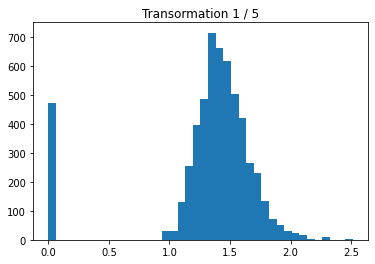

In [39]:
for i in [1, 2, 3, 4, 5]:
  plt.hist(data['body_punctuation_%'] ** (1 / i), bins=40)
  plt.title('Transormation 1 / {}'.format(str(i)))
  plt.show()

### **Random Forest**
- ensemble learning method: a collection of decision trees from which each prediction is aggregated to determine the final prediction
- versatile ( classification or regression ), inputs of various types, less likely to overfit, determines feature importance scores for each feature

In [40]:
X_tfidf = tfidf_vectorizer.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()

X_features = pd.concat([data['body_length'], data['body_punctuation_%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_length,body_punctuation_%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [42]:
# Allow to run faster by building the decision trees in paralel
rf = RandomForestClassifier(n_jobs=-1) 
k_fold = KFold(n_splits=5)

# Input features and labels separately
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97845601, 0.97755835, 0.97843666, 0.96495957, 0.97214735])

### **Random forest with holdout test set**

In [43]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import warnings

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=.2)

In [45]:
rf_holdout = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf_holdout.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [46]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06589059600358002, 'body_length'),
 (0.049883949784829316, 7350),
 (0.031528244006859794, 2031),
 (0.028267971727187376, 5988),
 (0.02800297777724607, 1803),
 (0.02616045913272859, 3134),
 (0.022870823419817273, 6746),
 (0.019135740065709755, 5724),
 (0.01757866761497825, 2171),
 (0.014761813008967622, 4796)]

In [47]:
y_prediction = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_prediction, pos_label='spam', average='binary')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [48]:
print('Precision: {}\nRecall: {}\nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_prediction == y_test).sum() / len(y_prediction), 3)
))

Precision: 1.0
Recall: 0.623
Accuracy: 0.953


**Interpretation**:    

- precision = 100%, all mail in the spam folder was actually spam
- recall = 56.7% of all spam received was placed in the spam folder
- accuracy = 94.2% of all mail was correctly classified as spam or not spam

### **Grid Search**

In [49]:
def train_random_forest(n_est, depth):
      rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
      model = rf.fit(X_train, y_train)
      y_prediction = model.predict(X_test)
      precision, recall, fscore, support = score(y_test, y_prediction, pos_label='spam', average='binary')
      print('Est: {}, depth: {}\ Precision: {}\ Recall: {}\ Accuracy: {}\ '.format(
          n_est, depth, round(precision, 3), round(recall, 3), round((y_prediction == y_test).sum() / len(y_prediction), 3)
      ))

In [50]:
with warnings.catch_warnings():
  warnings.filterwarnings('ignore')
  for n_est in [10, 50, 100]:
      for depth in [10, 20, 30, None]:
        train_random_forest(n_est, depth)

Est: 10, depth: 10\ Precision: 1.0\ Recall: 0.239\ Accuracy: 0.906\ 
Est: 10, depth: 20\ Precision: 0.977\ Recall: 0.623\ Accuracy: 0.952\ 
Est: 10, depth: 30\ Precision: 0.99\ Recall: 0.717\ Accuracy: 0.964\ 
Est: 10, depth: None\ Precision: 1.0\ Recall: 0.833\ Accuracy: 0.979\ 
Est: 50, depth: 10\ Precision: 1.0\ Recall: 0.239\ Accuracy: 0.906\ 
Est: 50, depth: 20\ Precision: 1.0\ Recall: 0.667\ Accuracy: 0.959\ 
Est: 50, depth: 30\ Precision: 1.0\ Recall: 0.732\ Accuracy: 0.967\ 
Est: 50, depth: None\ Precision: 1.0\ Recall: 0.826\ Accuracy: 0.978\ 
Est: 100, depth: 10\ Precision: 1.0\ Recall: 0.254\ Accuracy: 0.908\ 
Est: 100, depth: 20\ Precision: 1.0\ Recall: 0.63\ Accuracy: 0.954\ 
Est: 100, depth: 30\ Precision: 1.0\ Recall: 0.783\ Accuracy: 0.973\ 
Est: 100, depth: None\ Precision: 0.992\ Recall: 0.855\ Accuracy: 0.981\ 


### **Gradient Boosting**
- ensemble learning method: iterative approach, combines weak learners to create a strong learner by focusing on mistakes on the previous iterations
- **random forest**: training done in paralel, unweighted voting for final decision, easier to tune, harder to overfit
- **gradient boosting**: training done iteratively, weighted votinf for final decision, harder to tune, easier to overfit

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
def train_gradient_boosting(n_est, max_depth, learning_rate):
  gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, learning_rate=learning_rate)
  model = gb.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  precision, recall, fscore, support = score(y_test, y_prediction, pos_label='spam', average='binary')
  print('Est: {} / Depth: {} / Learning_rate: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(
      n_est, max_depth, learning_rate, round(precision, 3), round(recall, 3), 
       round((y_prediction == y_test).sum() / len(y_prediction), 3)
  ))

In [53]:
with warnings.catch_warnings():
  warnings.filterwarnings('ignore')

  for n_est in [100, 150]:
    for max_depth in [7, 11, 15]:
      for learning_rate in [0.01, 0.1]:
        train_gradient_boosting(n_est, max_depth, learning_rate)

Est: 100 / Depth: 7 / Learning_rate: 0.01 / Precision: 0.963 / Recall: 0.746 / Accuracy: 0.965
Est: 100 / Depth: 7 / Learning_rate: 0.1 / Precision: 0.953 / Recall: 0.891 / Accuracy: 0.981
Est: 100 / Depth: 11 / Learning_rate: 0.01 / Precision: 0.916 / Recall: 0.79 / Accuracy: 0.965
Est: 100 / Depth: 11 / Learning_rate: 0.1 / Precision: 0.926 / Recall: 0.906 / Accuracy: 0.979
Est: 100 / Depth: 15 / Learning_rate: 0.01 / Precision: 0.902 / Recall: 0.797 / Accuracy: 0.964
Est: 100 / Depth: 15 / Learning_rate: 0.1 / Precision: 0.926 / Recall: 0.906 / Accuracy: 0.979
Est: 150 / Depth: 7 / Learning_rate: 0.01 / Precision: 0.956 / Recall: 0.783 / Accuracy: 0.969
Est: 150 / Depth: 7 / Learning_rate: 0.1 / Precision: 0.946 / Recall: 0.891 / Accuracy: 0.98
Est: 150 / Depth: 11 / Learning_rate: 0.01 / Precision: 0.911 / Recall: 0.812 / Accuracy: 0.967
Est: 150 / Depth: 11 / Learning_rate: 0.1 / Precision: 0.94 / Recall: 0.906 / Accuracy: 0.981
Est: 150 / Depth: 15 / Learning_rate: 0.01 / Precisi

### **Final process**
1. Split the data into training / testing sets.
2. Train vectorizers on training set and use that to transform the testing set.
3. Fit best random forest model model and best gradient boosting model on training set and predict on the testing set.
4. Evaluate results of the two models to select the best model.